In [1]:
import os
os.environ['MUJOCO_GL'] = 'egl'
os.environ["MUJOCO_EGL_DEVICE_ID"] = "0"

import sys
from os.path import dirname, abspath
project_folder = dirname(dirname(abspath('rodent_task.py')))
sys.path.insert(1, project_folder)
from stage1_rodent_task import rodent_env

# The basic mujoco wrapper.
from dm_control import mujoco

# Access to enums and MuJoCo library functions.
from dm_control.mujoco.wrapper.mjbindings import enums
from dm_control.mujoco.wrapper.mjbindings import mjlib

# PyMJCF
from dm_control import mjcf

# Composer high level imports
from dm_control import composer
from dm_control.composer.observation import observable
from dm_control.composer import variation

# Imports for Composer tutorial example
from dm_control.composer.variation import distributions
from dm_control.composer.variation import noises
from dm_control.locomotion.arenas import floors

# Control Suite
from dm_control import suite

# Run through corridor example
from dm_control.locomotion.walkers import cmu_humanoid
from dm_control.locomotion.arenas import corridors as corridor_arenas
from dm_control.locomotion.tasks import corridors as corridor_tasks

import argparse
import random
import time
from distutils.util import strtobool
import gymnasium as gym
import numpy as np

from gymnasium.wrappers import ClipAction
import argparse
import os
import random
import time
from distutils.util import strtobool
import gymnasium as gym
import numpy as np

from gymnasium.wrappers import ClipAction,RecordVideo
import collections


import gymnasium as gym
from shimmy.dm_control_compatibility import DmControlCompatibilityV0

from matplotlib import pyplot as plt
import numpy as np
import csv

from dm_control.utils import rewards

from dm_control.mujoco.wrapper.mjbindings import enums
import PIL
import ctypes 
import time

import quaternions
import pickle 
from typing import Sequence, List, Any, NamedTuple, Tuple, Optional
from collections import namedtuple
import moviepy.video.io.ImageSequenceClip
from ipywidgets import Video

import numpy as np
import cv2
import moviepy.video.io.ImageSequenceClip
import os


/home/anirudh/anaconda3/envs/dmc/lib/python3.9/site-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists


pygame 2.5.2 (SDL 2.28.2, Python 3.9.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


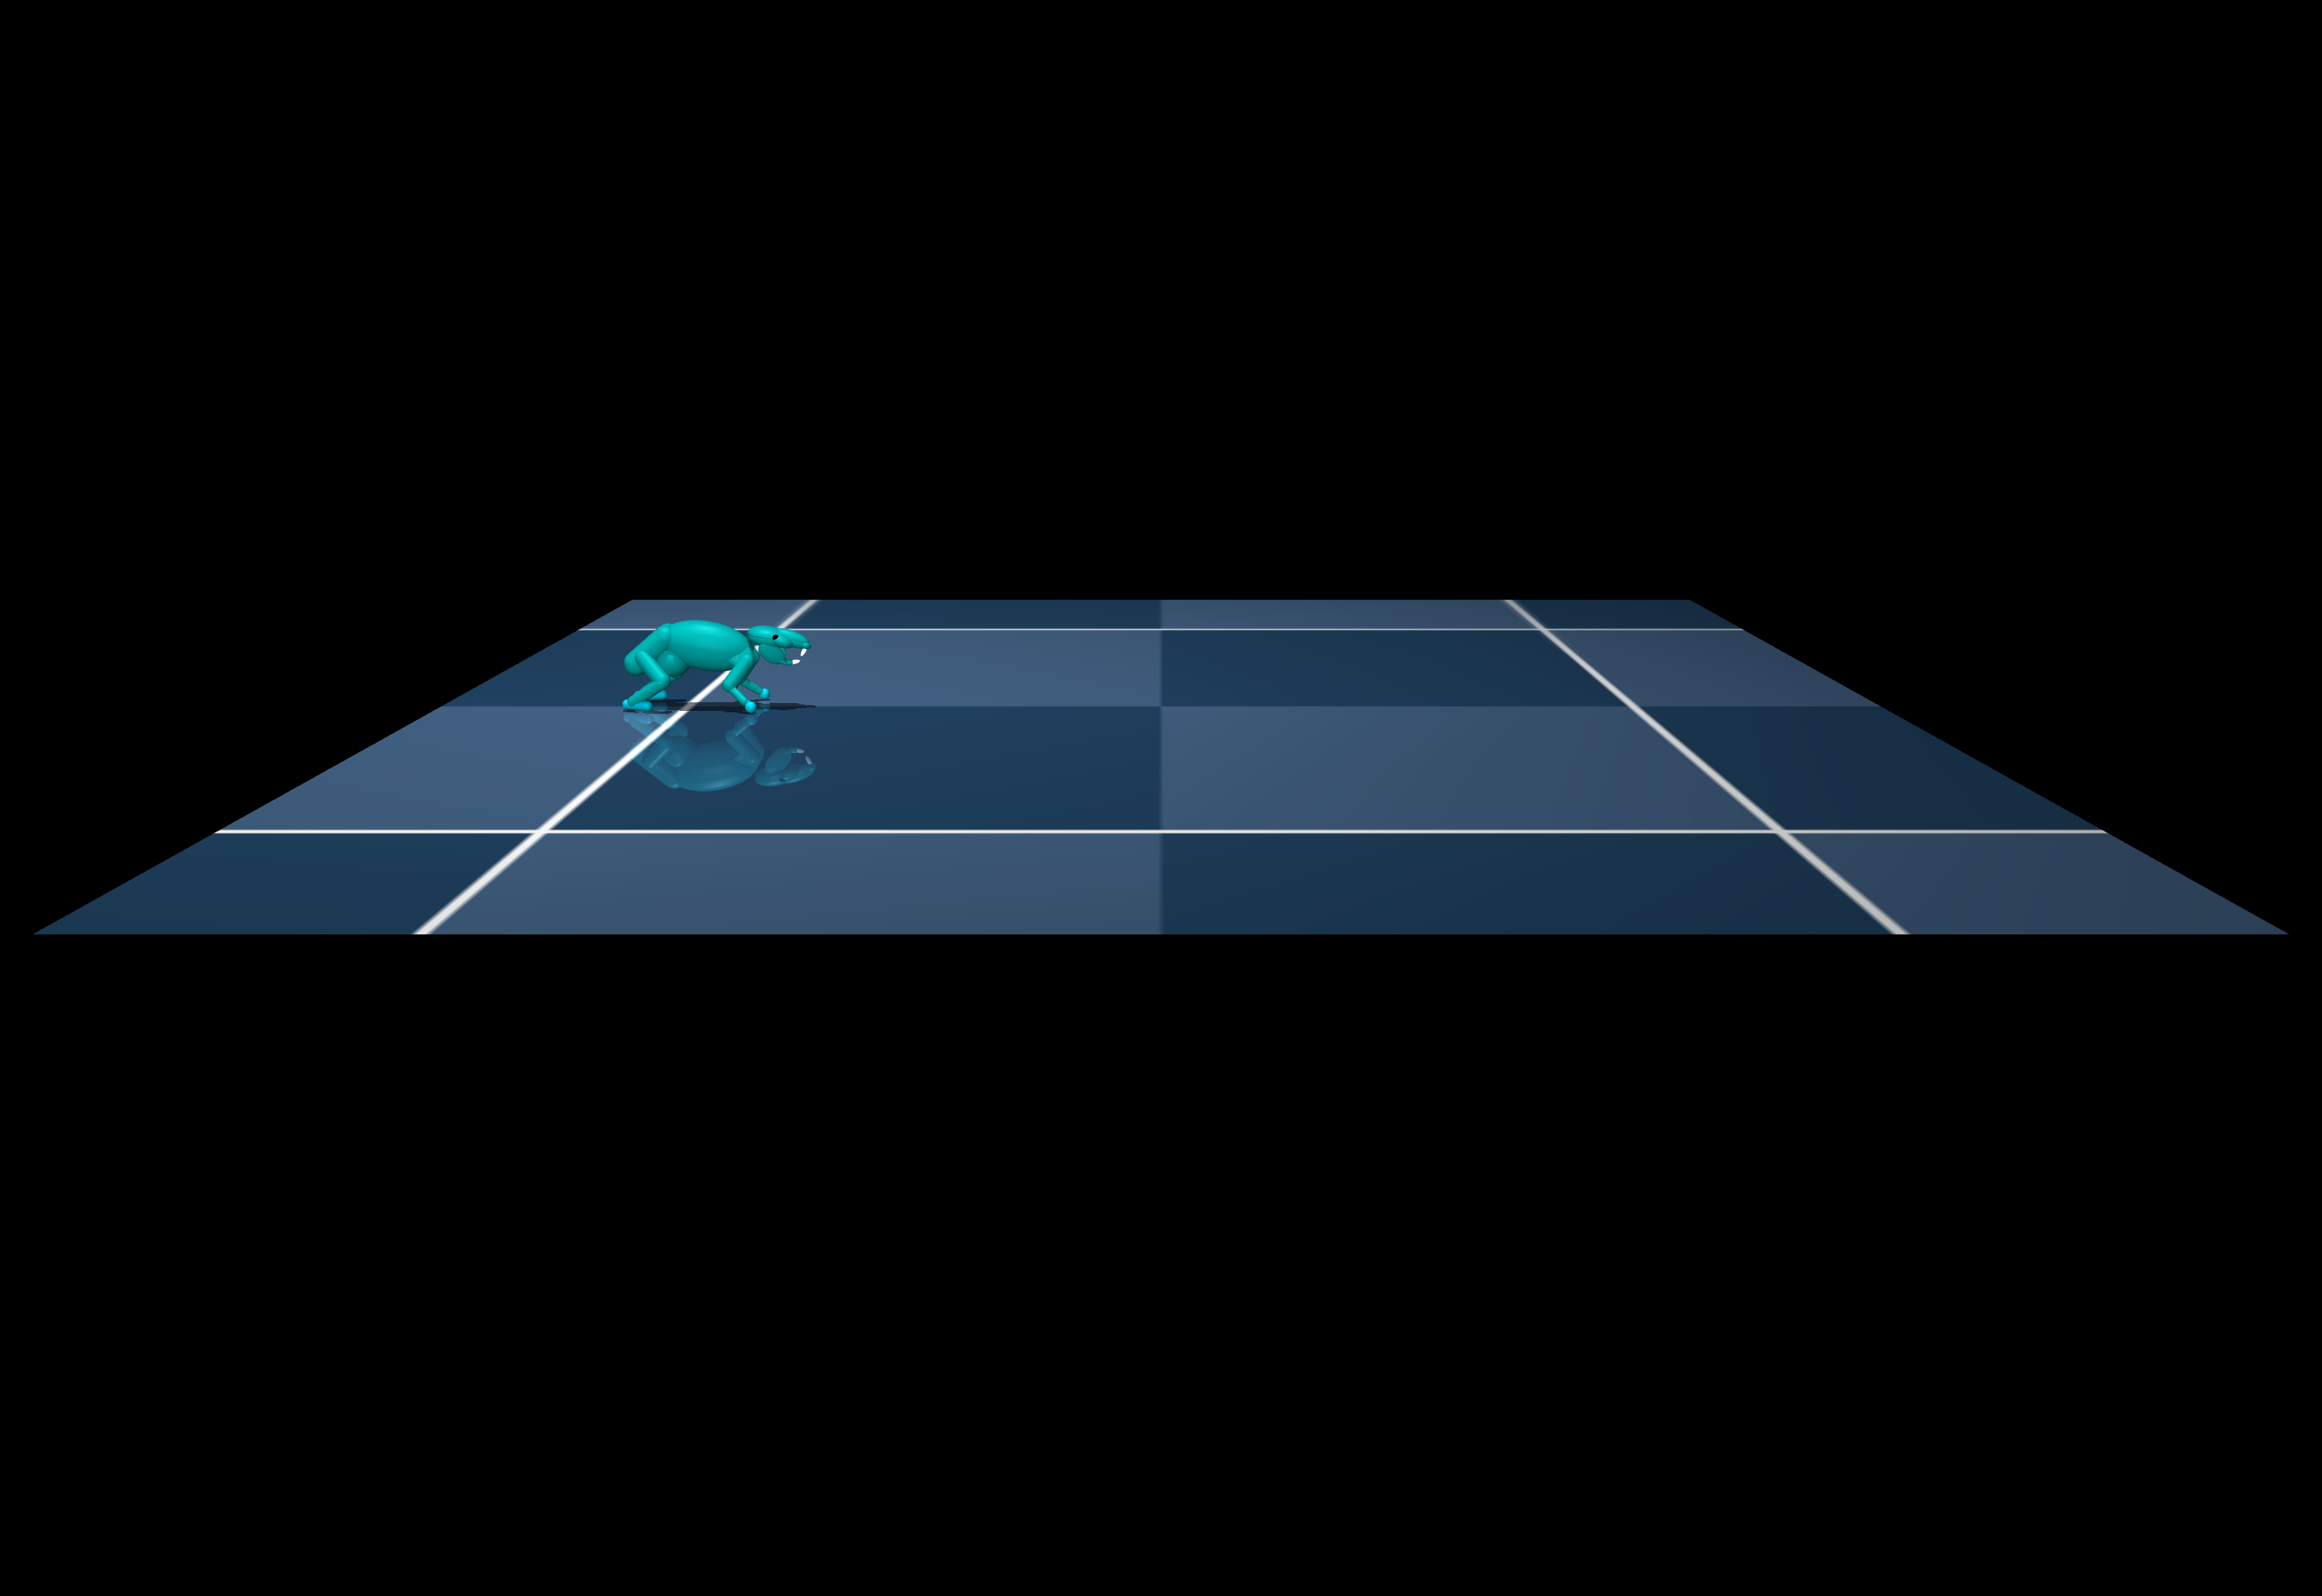

In [2]:
env = rodent_env(add_ghost=False,add_ball=False)
env.reset()
env.physics.named.data.qpos[:2] = [-0.5,0]
env.physics.step()
PIL.Image.fromarray(env.physics.render(camera_id=11,height=2200,width=3200))

In [3]:
dataset_num = 2
dataset_folder  = project_folder + '/dataset/' + str(dataset_num) + '/'
local_dataset_folder = '/home/anirudh/p6/dataset/' + str(dataset_num) + '/'
ik_data_path = local_dataset_folder + 'ik_comp.pkl'
num_frames_comparision = 2000
increase_freq = 3

In [ ]:
source = local_dataset_folder + 'Cam13.mp4'
vidcap = cv2.VideoCapture(source)
nframes = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
print( nframes)


In [ ]:
with open(ik_data_path, 'rb') as f:
	training_data = pickle.load(f)
qpos_data = training_data['qpos']
qpos_data = qpos_data[0:int(qpos_data.shape[0]/2)] #because ik has mirroe data
print(qpos_data.shape)
assert qpos_data.shape[0] == int(nframes)

In [ ]:
real_frames_dir = local_dataset_folder + 'real_frames/'
ik_frames_dir = local_dataset_folder + 'ik_frames/'
if not os.path.exists(real_frames_dir):
    os.makedirs(real_frames_dir)
if not os.path.exists(ik_frames_dir):
    os.makedirs(ik_frames_dir)

In [ ]:
for i in range(num_frames_comparision*increase_freq):
    success,image = vidcap.read()
    if i % increase_freq != 0:
        continue
    print(i)
    cv2.imwrite(real_frames_dir+"%d.png" % (i), image)

In [ ]:
all_ik_imgs = []
for i in range(num_frames_comparision*increase_freq):

    if i % increase_freq != 0:
        continue    
    
    print(i)
    with env.physics.reset_context():
        env.physics.data.qpos = qpos_data[i].copy()

    #img = PIL.Image.fromarray(env.physics.render(camera_id=11,height=2200,width=3208))
    #img.save(ik_frames_dir+str(i)+'.png')
    img = env.physics.render(camera_id=11,height=2200,width=3208)
    all_ik_imgs.append(img)

    

In [ ]:
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(all_ik_imgs, fps=10)
clip.write_videofile('../my_video.mp4')


In [ ]:
source = local_dataset_folder + 'my_video.mp4'
vidcap = cv2.VideoCapture(source)
nframes = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))

for i in range(nframes):
    success,image = vidcap.read()
   
    print(i)
    cv2.imwrite(local_dataset_folder+"/temp/%d.png" % (i), image)

In [7]:
from PIL import Image

image_files = []

gradient_image_path = local_dataset_folder+"gradient.png"
gradient_image = Image.open(gradient_image_path).convert("RGBA")



for i in range(1149,1561):



    
    frame1_file = local_dataset_folder+"/temp/"+str(i)+".png" 

    table_image = Image.open(frame1_file).convert("RGBA")
        
    # Resize the gradient image to match the current table image's dimensions
    gradient_resized = gradient_image.resize(table_image.size)
    
    # Composite the table image with the gradient
    combined_image = Image.alpha_composite(table_image, gradient_resized)
    
    # Save the combined image
    combined_image.save(local_dataset_folder+"/temp2/"+str(i)+".png")



    print(i)


1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348


In [8]:
image_files = []

for i in range(1149,1561):

   


    
    frame1_file = local_dataset_folder+"/temp2/"+str(i)+'.png'
    img1 = cv2.imread(frame1_file) 
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

    
    
    image_files.append(img1)

    print(i)




clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=15)
clip.write_videofile('../my_video.mp4')


1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348


Moviepy - Done !
Moviepy - video ready ../my_video.mp4


In [9]:
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=15)
clip.write_videofile('../my_video.mp4',bitrate='8000k')


Moviepy - Building video ../my_video.mp4.
Moviepy - Writing video ../my_video.mp4



Moviepy - Done !
Moviepy - video ready ../my_video.mp4


In [ ]:
image_files = []

for i in range(num_frames_comparision*increase_freq):

    if i % increase_freq != 0:
        continue

    def hconcat_resize_min(im_list, interpolation=cv2.INTER_CUBIC):
        h_min = min(im.shape[0] for im in im_list)
        im_list_resize = [cv2.resize(im, (int(im.shape[1] * h_min / im.shape[0]), h_min), interpolation=interpolation)
                        for im in im_list]
        return cv2.hconcat(im_list_resize)
    
    frame1_file = real_frames_dir+str(i)+'.png'
    frame2_file = ik_frames_dir+str(i)+'.png'
    img1 = cv2.imread(frame1_file) 
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.imread(frame2_file)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    im_v = hconcat_resize_min([img1,img2])
    
    image_files.append(im_v)

    print(i)




In [ ]:
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=10)
clip.write_videofile('../my_video.mp4')
